## Abstract:
One of the key activities of any IT function is to ensure there is no
impact to the Business operations. <b>IT leverages Incident Management process to achieve the
above Objective.</b> An incident is something that is unplanned interruption to an IT service or
reduction in the quality of an IT service that affects the Users and the Business. <b><i>The main goal
of Incident Management process is to provide a quick fix / workarounds or solutions that resolves the interruption and restores the service to its full capacity to ensure no business impact.</i></b>

In most of the organizations, incidents are created by various Business and IT Users, End Users/ Vendors if they have access to ticketing systems, and from the integrated monitoring
systems and tools. <b>Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources.</b>

<i> Manual assignment of incidents is time consuming and requires human efforts. There may be mistakes due to human errors and resource consumption is carried out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.</i>
#### <b>Business Domain Value:</b> 
In the support process, incoming incidents are analyzed and assessed by organization’s support teams to fulfill the request. In many organizations, better allocation and effective usage of the valuable support resources will directly result in substantial cost savings.

Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service Management Tool and are assigned to Service Desk teams (L1 / L2 teams). This team will review the incidents for right ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams. Incase L1 / L2 is unable to resolve, they will then escalate / assign the tickets to Functional teams from Applications and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56%
of incidents are resolved by Functional / L3 teams. Incase if vendor support is needed, they will reach out for their support towards incident closure.

L1 / L2 needs to spend time reviewing Standard Operating Procedures (SOPs) before assigning to Functional teams (Minimum ~25-30% of incidents needs to be reviewed for SOPs before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3 teams. During the process of incident assignments by L1 / L2 teams to functional groups, there were multiple instances of incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for Functional teams to re-assign to right functional groups. During this process, some of the incidents are in queue and not addressed timely resulting in poor customer service.

## Objective:
### Build Multi-Class classifier that can classify the tickets by analysing text.###
Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks.
### Milestones
1. Milestone 1: Pre-Processing, Data Visualisation and EDA
  1. Exploring the given Data files
  2. Understanding the structure of data
  3. Missing points in data
  4. Finding inconsistencies in the data
  5. Visualizing different patterns
  6. Visualizing different text features
  7. Dealing with missing values
  8. Text preprocessing
  9. Creating word vocabulary from the corpus of report text data
  10. Creating tokens as required

2. Milestone 2: Model Building
  1. Building a model architecture which can classify.
  2. Trying different model architectures by researching state of the art for similar tasks.
  3. Train the model
  4. To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch.

3. Milestone 3: Test the Model, Fine-tuning and Repeat
  1. Test the model and report as per evaluation metrics
  2. Try different models
  3. Try different evaluation metrics
  4. Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc..for these models to fine-tune them
  5. Report evaluation metrics for these models along with your observation on how changing different hyper parameters leads to change in the final evaluation metric.
---

### Imports and Configurations
Section to import all necessary packages. Install the libraries which are not included in Anaconda distribution by default using pypi channel or conda forge
**``!pip install ftfy wordcloud goslate googletrans translate``**<br/>
**``conda install -c conda-forge ftfy wordcloud goslate googletrans translate``**

In [1]:
!pip install wordcloud ftfy goslate

In [2]:
# Utilities
from time import time
from zipfile import ZipFile
import os, sys, itertools, warnings, pickle
from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Translation APIs
from goslate import Goslate # Provided by Google

# Numerical calculation
import numpy as np

# Data Handling
import pandas as pd

# Data Visualization
import plotly
import matplotlib.pyplot as plt
import seaborn as sns

# Sequential Modeling
import keras.backend as K
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Embedding, LSTM, TimeDistributed, Conv1D, MaxPooling1D
from keras.constraints import max_norm, unit_norm
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences

# Tools & Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler

# NLP toolkit
import nltk
from nltk import tokenize

Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [0]:
# Configure for any default setting of any library
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

- Extract Glove 6Billion word embeddings. We're going to use the 200d file which has 200 embedding dimensions for each word in the corpus.
- Load the bodies and headlines CSVs for both training and test data and join them together individually to form datasets.

### Set the working directory
Mount the drive and set the project path to cureent working directory, when running in Google Colab. No changes are required in case of running in Local PC.

In [4]:
# Block which runs on both Google Colab and Local PC without any modification
if 'google.colab' in sys.modules:    
    project_path = "/content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP/"
    # Google Colab lib
    from google.colab import drive
    # Mount the drive
    drive.mount('/content/drive/', force_remount=True)
    sys.path.append(project_path)
    %cd $project_path

# Let's look at the sys path
print('Current working directory', os.getcwd())

Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP
Current working directory /content/drive/My Drive/Colab Notebooks/DLCP/Capstone-NLP


### Extract Glove Embeddings
- Extract Glove 6Billion word embeddings. We're going to use the 200d file which has 200 embedding dimensions for each word in the corpus.

In [5]:
# Check if it is already extracted else Open the zipped file as readonly
if not os.path.isfile('glove.6B/glove.6B.200d.txt'):
    glove_embeddings = 'glove.6B.zip'
    with ZipFile(glove_embeddings, 'r') as archive:
        archive.extractall('glove.6B')

# List the files under extracted folder
os.listdir('glove.6B')

['glove.6B.200d.txt']

---
### Load the dataset

In [6]:
# Load the dataset into a Pandas dataframe called ticket and check the head of the dataset
ticket = pd.read_excel('Input Data Synthetic (created but not used in our project).xlsx', )
ticket.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [7]:
# Check the tail of the dataset
ticket.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


**Comments**
* To take a closer look at the data, pandas library provides **“.head()”** function which returns first five observations and **“.tail()”** function which returns last five observations of the data set.

### Inspect the Dataset
The dataset is divided into two parts, namely, **feature matrix** and the **response vector**.

- Feature matrix contains all the vectors(rows) of dataset in which each vector consists of the value of **dependent features**. In above dataset, features are *Short description*, *Description* and *Caller*.
- Response vector contains the value of **class variable**(prediction or output) for each row of feature matrix. In above dataset, the class variable name is *Assignment group*.

In [8]:
# Get the shape and size of the dataset
print('No of rows:\033[1m', ticket.shape[0], '\033[0m')
print('No of cols:\033[1m', ticket.shape[1], '\033[0m')

No of rows: 8500 
No of cols: 4 


In [9]:
# Get more info on it
# 1. Name of the columns
# 2. Find the data types of each columns
# 3. Look for any null/missing values
ticket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
Short description    8492 non-null object
Description          8499 non-null object
Caller               8500 non-null object
Assignment group     8500 non-null object
dtypes: object(4)
memory usage: 265.8+ KB


In [10]:
# Describe the dataset with various summary and statistics
ticket.describe()

,Short description,Description,Caller,Assignment group
count,8492,8499,8500,8500
unique,7481,7817,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [11]:
# Check the Short description of tickets having Description as only 'the'
ticket[ticket.Description == 'the'].head()

,Short description,Description,Caller,Assignment group
1049,reset passwords for soldfnbq uhnbsvqd using pa...,the,soldfnbq uhnbsvqd,GRP_17
1054,reset passwords for fygrwuna gomcekzi using pa...,the,fygrwuna gomcekzi,GRP_17
1144,reset passwords for wvdxnkhf jirecvta using pa...,the,wvdxnkhf jirecvta,GRP_17
1184,reset passwords for pxvjczdt kizsjfpq using pa...,the,pxvjczdt kizsjfpq,GRP_17
1292,reset passwords for cubdsrml znewqgop using pa...,the,cubdsrml znewqgop,GRP_17


In [12]:
# Find out the null value counts in each column
ticket.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

**Observations**
- The dataset comprises of **8500 rows** and **4 columns**
- All columns are of type object containing textual information.
- There are **8 null/missing values** present in the Short description and **1 null/missing values** present in the description column
- **Password reset** is one of the most occuring tickets which reflects in the Short description column.
- The top occuring Description in the dataset is only the text **'the'**, which absolutely doesn't make any sense. hence by looking at the Short description of such rows reveals that these are also a category of Password reset.

### NULL treatment

In [13]:
# Let's look at the rows with null values
ticket[pd.isnull(ticket).any(axis=1)]

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [14]:
# NULL replacement
ticket.fillna(str(), inplace=True)
ticket[pd.isnull(ticket).any(axis=1)]

,Short description,Description,Caller,Assignment group


In [15]:
# verify the replacement
ticket.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

**Comments**:
- We have various ways of treating the NULL/Missing values in the dataset such as 
    - Replacing them with empty string 
    - Replacing them with some default values
    - Duplicating the Short description and Description values wherever one of them is Null
    - Dropping the records with null/missing values completely.
- We're not choosing to drop any record as we don't want to loose any information. And as we're going to concatenate the Short description and Description columns for each record while feeding them into NLP, we neither want to pollute the data by introducing any default values nor bias it by duplicating the description colomns.
- Hence our NULL/Missing value treatment replaces the NaN cells with just empty string.

### Mojibake 
[Mojibake](https://en.wikipedia.org/wiki/Mojibake) is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system.<br/>
This display may include the generic replacement character ("�") in places where the binary representation is considered invalid. A replacement can also involve multiple consecutive symbols, as viewed in one encoding, when the same binary code constitutes one symbol in the other encoding. This is either because of differing constant length encoding (as in Asian 16-bit encodings vs European 8-bit encodings), or the use of variable length encodings (notably UTF-8 and UTF-16). Few such Mojibakes are **¶**, **ç**, **å**, **€**, **æ**, **œ**, **º**, **‡**, **¼**, **¥** etc.

As we're dealing with Natural Language and the source of the data is unknown to us, let's run the encoding check to figure out if the dataset is Mojibake impacted.

The library **ftfy** (Fixes Text For You) has a greater ability to detect, fix and deal with such Mojibakes. It fixes Unicode that’s broken in various ways. The goal of ftfy is to take in bad Unicode and output good Unicode.

Installation:<br/>
using pypi: **`!pip install ftfy`**<br/>
using conda: **`conda install -c conda-forge ftfy`**

In [16]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    
# Check the dataset for mojibake impact
ticket[~ticket.iloc[:,:-1].applymap(is_mojibake_impacted).all(1)]

,Short description,Description,Caller,Assignment group
99,password expiry tomorrow,\n\nreceived from: ecprjbod.litmjwsy@gmail.com...,ecprjbod litmjwsy,GRP_0
116,server issues,\r\n\r\nreceived from: bgqpotek.cuxakvml@gmail...,bgqpotek cuxakvml,GRP_0
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, octobe...",tvcdfqgp nrbcqwgj,GRP_0
164,æ’¤å›ž: ticket_no1564867 -- comments added,\n\nreceived from: abcdri@company.com\n\nwindy...,tycludks cjofwigv,GRP_0
170,[urgent!!] delivery note creation request!!,\n\nreceived from: fbvpcytz.nokypgvx@gmail.com...,fbvpcytz nokypgvx,GRP_18
...,...,...,...,...
8470,please review your recent ticketing_tool ticke...,"from: mikhghytr wafglhdrhjop \nsent: thursday,...",azxhejvq fyemlavd,GRP_16
8471,ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,to å°è´ºï¼Œæ—©ä¸Šç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥,xqyjztnm onfusvlz,GRP_30
8480,customer group enhanced field,\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail...,nlearzwi ukdzstwi,GRP_9
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [17]:
# Take an example of row# 8471 Short Desc and fix it
print('Grabled text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (ticket['Short description'][8471], 
                                                                        fix_text(ticket['Short description'][8471])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Grabled text: ç”µè„‘å¼€æœºå¼€ä¸å‡ºæ¥
Fixed text: 电脑开机开不出来

Mojibake Symbol RegEx:
 [ÂÃĂ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃĂ][›»‘”©™]\w|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [18]:
# Sanitize the dataset from Mojibakes
ticket['Short description'] = ticket['Short description'].apply(fix_text)
ticket['Description'] = ticket['Description'].apply(fix_text)

# Visualize that row# 8471
ticket.iloc[8471,:]

Short description             电脑开机开不出来
Description           to 小贺,早上电脑开机开不出来
Caller               xqyjztnm onfusvlz
Assignment group                GRP_30
Name: 8471, dtype: object

In [0]:
# Serialize the mojibake treated dataset
ticket.to_csv('mojibake_encoded.csv',encoding='utf_8_sig')
with open('mojibake_treated.pickle', 'wb') as handle:
    pickle.dump(ticket, handle, protocol=pickle.HIGHEST_PROTOCOL)

**Comments:**
- `badness.sequence_weirdness()` determines how often a text has unexpected characters or sequences of characters. This metric is used to disambiguate when text should be re-decoded or left as is.
- We're successfuly able to get the grabled characters back into their original form using **ftfy.fix_text()``**, however it is observed that the row# 8471 is not English but Mandarine.
- So the data in our hand is multilingual and it is quite not possible to derive embeddings for mix of multiple languages. We're going to translate the entire dataset into a single language of English.

### Language Translation (Goslate: Free Google Translate API)
Goslate is an open source python library that implemented Google Translate API. This uses the [Google Translate Ajax API](https://translate.google.com/) to make calls to such methods as detect and translate. It is choosen over another library Googletrans from Google as Goslate is developed to bypass the ticketing mechanism to prevent simple crawler program to access the Ajax API. Hence Goslate with multiple service urls is able to translate the entire dataset in very few iterations without blocking the user's IP address.

Installation:<br/>
using pypi: **`!pip install goslate`**<br/>
using conda: **`conda install -c conda-forge goslate`**

Servicce Urls used:
**``translate.google.com``**, **``translate.google.com.au``**, **``translate.google.com.ar``**, **``translate.google.co.kr``**, **``translate.google.co.in``**, **``translate.google.co.jp``**, **``translate.google.at``**, **``translate.google.de``**, **``translate.google.ru``**, **``translate.google.ch``**, **``translate.google.fr``**, **``translate.google.es``**, **``translate.google.ae``**

In [20]:
# Define and construct the service urls
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

# Take an example of row# 8471 Short Desc and fix it
gs = Goslate(service_urls=svc_urls)
trans_8471 = gs.translate(ticket['Short description'][8471], target_language='en', source_language='auto')
print('Original text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (ticket['Short description'][8471], trans_8471))

Original text: 电脑开机开不出来
Fixed text: Boot the computer does not really come out


In [0]:
# List of column data to consider for translation
trans_cols = ['Short description','Description']
# for idx in range(ticket.shape[0]):
#     # Instantiate Goslate class in each iteration
#     gs = Goslate(service_urls=svc_urls)
#     row_iter = gs.translate(ticket.loc[idx, trans_cols].tolist(), 
#                             target_language='en', 
#                             source_language='auto')
#     ticket.loc[idx, trans_cols] = list(row_iter)

In [0]:
# Serialize the translated dataset
# ticket.to_csv('translated_ticket.csv', encoding='utf_8_sig')
# with open('translated_ticket.pkl','wb') as f:
#     pickle.dump(ticket, f, pickle.HIGHEST_PROTOCOL)

In [0]:
# Load the serialized dataset
with open('translated_ticket.pkl','rb') as f:
    ticket = pickle.load(f)

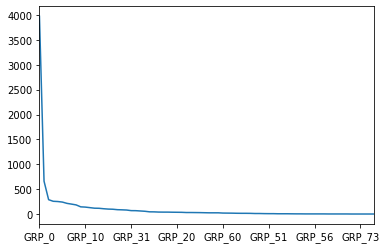

In [0]:
ticket['Assignment group'].value_counts().plot()

In [0]:
inc_grps = ticket['Assignment group'].value_counts()

In [0]:
len(inc_grps)

74

In [0]:
print("Have around 74 unique groups")

In [0]:
ticket.columns

Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')

In [0]:
X = ticket.loc[:,['Short description', 'Description']]
y=ticket.iloc[:,3]

In [0]:
print("Total Dataset instances:", len(ticket))
print("Total Dataset[X] instances:", len(X))
print("Total Dataset[y] instances:", len(y))

Total Dataset instances: 8500
Total Dataset[X] instances: 8500
Total Dataset[y] instances: 8500


In [0]:
print("X Dataset columns:", X.columns)

X Dataset columns: Index(['Short description', 'Description'], dtype='object')


### 'Caller' column does not provide any valid information, hence droping the same

In [0]:
print("Check if any of the columns has NaN values.")
X.info()

Check if any of the columns has NaN values.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 2 columns):
Short description    8492 non-null object
Description          8499 non-null object
dtypes: object(2)
memory usage: 132.9+ KB


In [0]:
print("Seems like we have 7 records off which Short Description is not given i.e. those are NaN")
X_cleared = X.fillna(value='')

Seems like we have 7 records off which Short Description is not given i.e. those are NaN


In [0]:
print("Retain a copy of X")
X_copy = X.copy()
X = X_cleared.copy()

Retain a copy of X


In [0]:
X.columns

Index(['Short description', 'Description', 'issue_description'], dtype='object')

In [0]:
print("Let's combine both 'Short Description' & 'Description'")
X['issue_description'] = X["Short description"].map(str) + " . " + X["Description"].map(str)

Let's combine both 'Short Description' & 'Description'


## Short Description and Description Can sometime be SAME like Row 15. Should we remove duplicates?

In [0]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
Short description    8500 non-null object
Description          8500 non-null object
issue_description    8500 non-null object
dtypes: object(3)
memory usage: 199.3+ KB


In [0]:
print("Check any NaN values")
X[pd.isnull(X).any(axis=1)]

Check any NaN values


,Short description,Description,issue_description


In [0]:
print("Resample the Lower numbered Instances:")
ros = RandomOverSampler(random_state=47)
X_resampled, y_resampled = ros.fit_resample(X, y)

Resample the Lower numbered Instances:


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
len(y_resampled)

294224

In [0]:
ticket_rmpld = pd.DataFrame(X_resampled, columns=['short_description','description','issue_description'])

In [0]:
ticket_rmpld['group'] = y_resampled

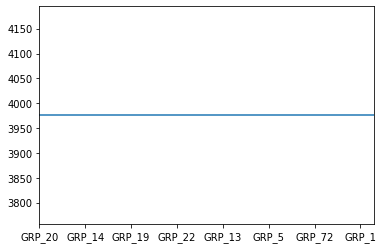

In [0]:
ticket_rmpld['group'].value_counts().plot()

In [0]:
print("ALL GROUPS  NOW HAVE SAME INSTANCE COUNTS")

ALL GROUPS  NOW HAVE SAME INSTANCE COUNTS


In [0]:
print("Let's do some data processing and model parameters setting")
MAX_NB_WORDS = 20000
MAX_SENTS = 20
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 20
VALIDATION_SPLIT = 0.2

Let's do some data processing and model parameters setting


In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from keras.preprocessing.text import Tokenizer

In [0]:
t = Tokenizer(num_words=MAX_NB_WORDS,filters= '!"#$%&()*+,-./:;<=>?@[\]^_`{|}\n“~')

In [0]:
t.fit_on_texts(ticket_rmpld['issue_description'])

In [0]:
ticket_rmpld.iloc[15,2]

'ticket update on inplant_874743 . ticket update on inplant_874743'

In [0]:
print("FACTORED IN X COPY")
X.iloc[15,0:2]

FACTORED IN X COPY


Short description    ticket update on inplant_874743
Description          ticket update on inplant_874743
Name: 15, dtype: object

In [0]:
print("Untouched COPY")
X_copy.iloc[15,0:2]

Untouched COPY


Short description    ticket update on inplant_874743
Description          ticket update on inplant_874743
Name: 15, dtype: object

In [0]:
vocab_size = len(t.word_index) + 1
print(vocab_size)

23773


In [0]:
texts = [] ## body
statements =[] ## body splitted into senteces and stored as a list of lists

## split into sentences
for idx in range(ticket_rmpld['issue_description'].shape[0]):
    text = ticket_rmpld['issue_description'][idx]
    texts.append(text)
    sentences = tokenize.sent_tokenize(text)
    statements.append(sentences)

In [0]:
print("Let's check collected statement at 0 index")
statements[0]

Let's check collected statement at 0 index


['login issue .',
 '-verified user details.',
 '(employee# & manager name)\r\n-checked the user name in ad and reset the password.',
 '-advised the user to login and check.',
 '-caller confirmed that he was able to login.',
 '-issue resolved.']

### Text Cleaning is required.... remove -, ( , # and other characters

In [0]:
## Text TO IDS encoding is required
data = np.zeros((len(texts), MAX_SENTS, MAX_SENT_LENGTH), dtype='int32')
## word index encoding
for i, sentences in enumerate(statements):
    for j, sent in enumerate(sentences):
        if j < MAX_SENTS:
            wordTokens = text_to_word_sequence(sent)
            k = 0
            for _, word in enumerate(wordTokens):
                try:
                    if k < MAX_SENT_LENGTH and t.word_index[word] < MAX_NB_WORDS:
                      data[i, j, k] = t.word_index[word]
                      k = k + 1
                except:
#                       print(word)
                        pass

In [0]:
print("Check the sentences are encoded")
data[0, :, :]

Check the sentences are encoded


array([[ 164,   75,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1438,   52,  599,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 596,  152,   90,    1, 1080,    3,   52,   90,    4, 1155,    7,
         194,    3,  108,    0,    0,    0,    0,    0,    0],
       [2728,    3,   52,    2,  164,    7,  157,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [2111, 1141,   40,  409,   81,  198,    2,  164,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  75, 2220,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    

### LOOKS SPARSE MATRIX,, SHOULD WE DO CORRECT IT?